In [8]:
%matplotlib inline
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np


# Fit a model to the Iris data

In [9]:
# get data
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("orignal dimensions of feature matrix = {}".format(X.shape))

# add many columns of noise to the feature matrix to make the problem harder
n_samples, n_features = X.shape
X = np.c_[X, np.random.randn(n_samples, 100 * n_features)]
print("new dimensions of feature matrix = {}".format(X.shape))

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], 
    test_size=.5, 
)

orignal dimensions of feature matrix = (150, 4)
new dimensions of feature matrix = (150, 404)


In [3]:
# Create a simple classifier
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)

# predict on the trained classifier
target_class_probability = model.predict_proba(X_test)[:,1]
target_class_assignment = model.predict(X_test)

In [4]:
# IF P (Y=0) > 0.5: assign to negative class
# show that the assignment is based on the predicted probability
(target_class_probability > 0.5) == target_class_assignment

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

# Calculate accuracy sklearn.metrics

In [10]:
y_hat = target_class_assignment.copy()
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_hat)
precision = metrics.precision_score(y_true=y_test, y_pred=y_hat)
recall = metrics.recall_score(y_true=y_test, y_pred=y_hat)
classification_report= metrics.classification_report(y_true=y_test, y_pred=y_hat)
average_precision = metrics.average_precision_score(y_true=y_test, y_score=target_class_probability)


print('accuracy: {:.3f}'.format(accuracy))
print('precision: {:.3f}'.format(precision))
print('recall: {:.3f}'.format(recall))
print('=========================================================')
print('classification_report: \n{}'.format(classification_report))

accuracy: 0.640
precision: 0.696
recall: 0.593
classification_report: 
             precision    recall  f1-score   support

          0       0.59      0.70      0.64        23
          1       0.70      0.59      0.64        27

avg / total       0.65      0.64      0.64        50



# Precision-Recall Curve

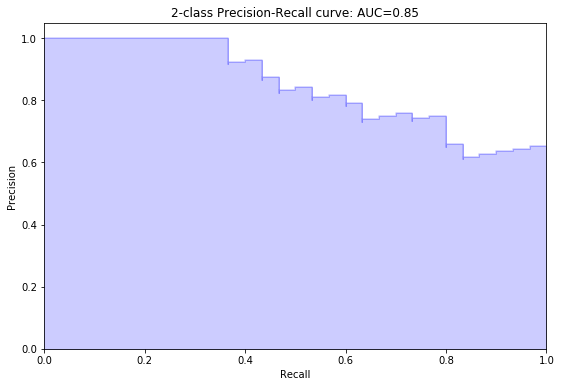

In [6]:
# plot precision-recall curve
precision, recall, thresholds = metrics.precision_recall_curve(
    y_true=y_test, 
    probas_pred=target_class_probability
)
plt.figure(figsize=(9,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))

# Receiver Operating Characteristic (ROC)

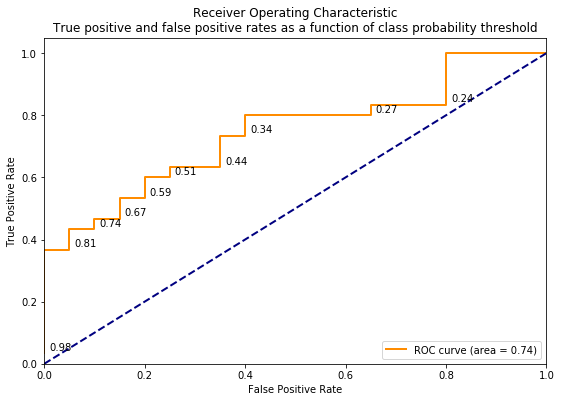

In [7]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(
    y_true=y_test, 
    y_score=target_class_probability
)
roc_auc = metrics.auc(x=false_positive_rate, y=true_positive_rate)

plt.figure(figsize=(9,6))
lw = 2
plt.plot(false_positive_rate, true_positive_rate, 
         color='darkorange', lw=lw, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic\n\
True positive and false positive rates as a function of class probability threshold'
         )
plt.legend(loc="lower right")
[plt.annotate("{:.2f}".format(threshold), xy=(fpr, tpr), xytext=(fpr + 0.01, tpr + 0.01)) \
 for tpr, fpr, threshold in list(zip(true_positive_rate, false_positive_rate, thresholds))[0:-1:2]]
plt.show()
